# Statsmodels 튜토리얼

In [1]:
import statsmodels

```{admonition} 하위모듈확인
**help로 확인한다**        
```

In [2]:
help(statsmodels)

Help on package statsmodels:

NAME
    statsmodels

PACKAGE CONTENTS
    _version
    api
    base (package)
    compat (package)
    conftest
    datasets (package)
    discrete (package)
    distributions (package)
    duration (package)
    emplike (package)
    formula (package)
    gam (package)
    genmod (package)
    graphics (package)
    imputation (package)
    interface (package)
    iolib (package)
    miscmodels (package)
    multivariate (package)
    nonparametric (package)
    othermod (package)
    regression (package)
    robust (package)
    sandbox (package)
    src (package)
    stats (package)
    tests (package)
    tools (package)
    tsa (package)

FUNCTIONS
    test(extra_args=None, exit=False)
        Run the test suite
        
        Parameters
        ----------
        extra_args : list[str]
            List of argument to pass to pytest when running the test suite. The
            default is ['--tb=short', '--disable-pytest-warnings'].
        exit : b

## 자주쓰는 모듈 구성

In [3]:
statsmodels='''statsmodels
│
├── 01 사후분석
│   │
│   └──stats
│       └── multicomp
│           ├── MultiComparison
│           │   └── allpairtest
│           └── pairwise_tukeyhsd
│
├── 02 시계열분석
│   │
│   ├── graphics.tsaplots
│   │   ├── plot_acf
│   │   └── plot_pacf
│   └── tsa
│       ├── arima_model
│       │   └── ARIMA
│       └── statesplace.sarimax
│           └── SARIMAX
│
├── 03 ANOVA (scipy모듈과 함께써야 모두 커버가능, 이분산 anova의 경우 pingouin모듈의 welch_anova를 사용)
│   │
│   ├── 다원분산분석 or 이원분산분석
│   └── 일원분산분석
│       └── stats.anova
│           └── anova_lm
│
└── 04 회귀분석
    │
    └── formula.api
        └── ols
'''
print(statsmodels)

statsmodels
│
├── 01 사후분석
│   │
│   └──stats
│       └── multicomp
│           ├── MultiComparison
│           │   └── allpairtest
│           └── pairwise_tukeyhsd
│
├── 02 시계열분석
│   │
│   ├── graphics.tsaplots
│   │   ├── plot_acf
│   │   └── plot_pacf
│   └── tsa
│       ├── arima_model
│       │   └── ARIMA
│       └── statesplace.sarimax
│           └── SARIMAX
│
├── 03 ANOVA (scipy모듈과 함께써야 모두 커버가능, 이분산 anova의 경우 pingouin모듈의 welch_anova를 사용)
│   │
│   ├── 다원분산분석 or 이원분산분석
│   └── 일원분산분석
│       └── stats.anova
│           └── anova_lm
│
└── 04 회귀분석
    │
    └── formula.api
        └── ols



## 세 집단 이상 검정 (independent)
정규성(scipy.stats.shapiro), 등분산(scipy.stats.levene) 검정의 결과에 따라 시행하는 검정이 다르다    
`정규성 만족, 등분산 만족`   : one-way anova    
`정규성 만족, 등분산 불만족` : welch's anova      
`정규성 불만족`            : kruskal-wallis H test

```{admonition} Question 
**x1,x2,x3의 변수들의 평균의 차이가 존재하는지 검정하라.      
차이가 존재한다면 사후 분석까지 진행하라**
```

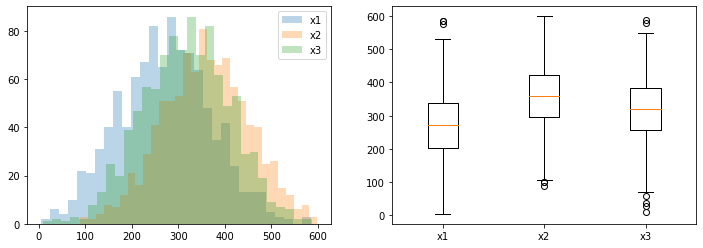

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova.csv')

data = df.x1
data2 = df.x2
data3 = df.x3

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(data,alpha=0.3,bins=30,label='x1')
ax[0].hist(data2,alpha=0.3,bins=30,label='x2')
ax[0].hist(data3,alpha=0.3,bins=30,label='x3')
ax[0].legend()
labels = ['x1', 'x2', 'x3']
lst =[data,data2,data3]
ax[1].boxplot(lst, labels=labels) 
plt.show()

In [5]:
from scipy.stats import shapiro

# 정규성 검정 -> 모두 정규성을 가짐
print(shapiro(data))
print(shapiro(data2))
print(shapiro(data3))

from scipy.stats import levene

# 등분산 만족한다
print(levene(data,data2,data3))
print()

# anova 방법 1 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
dfm =df.melt()
dfm.head()
model = ols('value ~ C(variable)', dfm).fit()
print(anova_lm(model))
print()

# anova 방법 2 (scipy.stats.f_oneway)
from scipy.stats import f_oneway 
print(f_oneway(data, data2, data3))

# p-value 는 4.9e-86이므로 3그룹중 어느 두 그룹은 평균이 동일하다고 볼수 없다

ShapiroResult(statistic=0.9979788064956665, pvalue=0.27388232946395874)
ShapiroResult(statistic=0.9979414939880371, pvalue=0.25899720191955566)
ShapiroResult(statistic=0.9987626671791077, pvalue=0.7304413914680481)
LeveneResult(statistic=2.71270174202054, pvalue=0.06652021922816238)

                 df        sum_sq       mean_sq           F        PR(>F)
C(variable)     2.0  3.774347e+06  1.887173e+06  209.884999  4.919153e-86
Residual     2997.0  2.694742e+07  8.991464e+03         NaN           NaN

F_onewayResult(statistic=209.88499932318638, pvalue=4.919152988455592e-86)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
    x1     x2  86.8388  -0.0  76.8951  96.7825   True
    x1     x3  45.8253  -0.0  35.8816  55.7691   True
    x2     x3 -41.0135  -0.0 -50.9572 -31.0697   True
-----------------------------------------------------


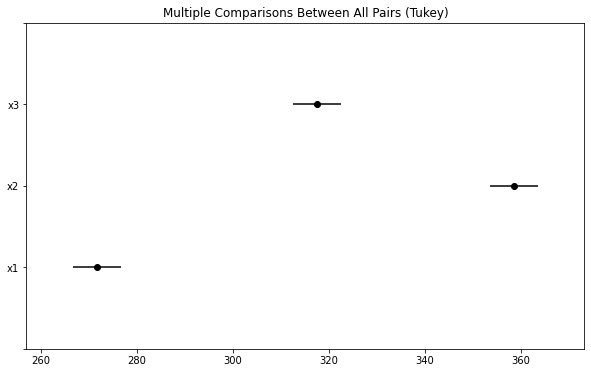

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval pval_corr reject
--------------------------------------------
    x1     x2 -20.2943  0.0       0.0   True
    x1     x3 -10.6639  0.0       0.0   True
    x2     x3    9.897  0.0       0.0   True
--------------------------------------------


In [6]:
#사후검정 방법 1 투키의 HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 유의수준 5%기준으로 도표상의 reject을 보면 group간에 모든 귀무가설(두 그룹의 평균은 같다)을 기각 하는 것을 볼수 있다
posthoc = pairwise_tukeyhsd(dfm.value, dfm.variable, alpha=0.05)
print(posthoc)

# 시각화 y축은 각 label이다. 겹치는 구간이 없으므로 차이가 존재함을 알수 있음
fig = posthoc.plot_simultaneous()
plt.show()


# 사후 검정 방법 2 봉페로니 교정
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(dfm.value, dfm.variable)
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
print(result[0])


```{admonition} Question 
**x1,x2,x3의 변수들의 평균의 차이가 존재하는지 검정하라**
```

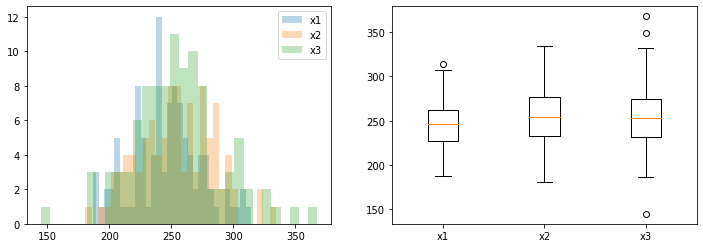

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova2.csv')

data = df.x1
data2 = df.x2
data3 = df.x3

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(data,alpha=0.3,bins=30,label='x1')
ax[0].hist(data2,alpha=0.3,bins=30,label='x2')
ax[0].hist(data3,alpha=0.3,bins=30,label='x3')
ax[0].legend()
labels = ['x1', 'x2', 'x3']
lst =[data,data2,data3]
ax[1].boxplot(lst, labels=labels) 
plt.show()

In [8]:
from scipy.stats import shapiro

# 정규성 검정 -> 모두 정규성을 가짐
print(shapiro(data))
print(shapiro(data2))
print(shapiro(data3))

from scipy.stats import levene

# 등분산 만족한다
print(levene(data,data2,data3))
print()

# anova 방법 1 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
dfm =df.melt()
dfm.head()
model = ols('value ~ C(variable)', dfm).fit()
print(anova_lm(model))
print()

# anova 방법 2 (scipy.stats.f_oneway)
from scipy.stats import f_oneway 
print(f_oneway(data, data2, data3))

# p-value 는 0.09이므로 귀무가설을 기각할 수 없다. 3그룹은 평균이 동일하다고 볼 수 있다.

ShapiroResult(statistic=0.9886646866798401, pvalue=0.5584300756454468)
ShapiroResult(statistic=0.992436408996582, pvalue=0.8518696427345276)
ShapiroResult(statistic=0.9848726987838745, pvalue=0.31093811988830566)
LeveneResult(statistic=1.845797549925243, pvalue=0.15970603203148068)

                df         sum_sq      mean_sq         F    PR(>F)
C(variable)    2.0    4856.241506  2428.120753  2.386153  0.093744
Residual     297.0  302223.696757  1017.588205       NaN       NaN

F_onewayResult(statistic=2.386152612702158, pvalue=0.09374426938585284)


```{admonition} Question 
**target 변수들에 의해 value값들의 평균의 차이가 존재하는지 검정하라**
```

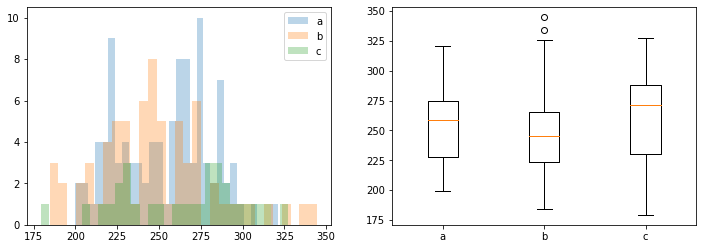

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova8.csv')

data = df[df.target=='a'].value
data2 = df[df.target=='b'].value
data3 = df[df.target=='c'].value

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(data,alpha=0.3,bins=30,label='a')
ax[0].hist(data2,alpha=0.3,bins=30,label='b')
ax[0].hist(data3,alpha=0.3,bins=30,label='c')
ax[0].legend()
labels = ['a', 'b', 'c']
lst =[data,data2,data3]
ax[1].boxplot(lst, labels=labels) 
plt.show()

In [10]:
from scipy.stats import shapiro

# 정규성 검정 -> 하나의 변수가 정규성을 가지지 않는다. -> 비모수 검정인 kruskal 검정을 사용해야한다
print(shapiro(data))
print(shapiro(data2))
print(shapiro(data3))

from scipy.stats import levene

# 등분산 만족한다
print(levene(data,data2,data3))
print()

# anova
from scipy.stats import f_oneway  ,kruskal
print(f_oneway(data, data2, data3))
print(kruskal(data, data2, data3))

# 비교를 위해 f_oneway 와 kruskal 모두 시행했다.
# kruskal의 경우 평균의 차이가 존재, f_oneway의 경우 차이가 존재하지 않는다

ShapiroResult(statistic=0.9666388034820557, pvalue=0.01229821890592575)
ShapiroResult(statistic=0.9713969230651855, pvalue=0.1093384176492691)
ShapiroResult(statistic=0.9651245474815369, pvalue=0.4156579077243805)
LeveneResult(statistic=1.4817966330841852, pvalue=0.2297504921313145)

F_onewayResult(statistic=2.7145676300093733, pvalue=0.06871171968864054)
KruskalResult(statistic=6.9277037668798584, pvalue=0.03130893110123)


```{admonition} Question 
**target 변수들에 의해 value값들의 평균의 차이가 존재하는지 검정하라**
```

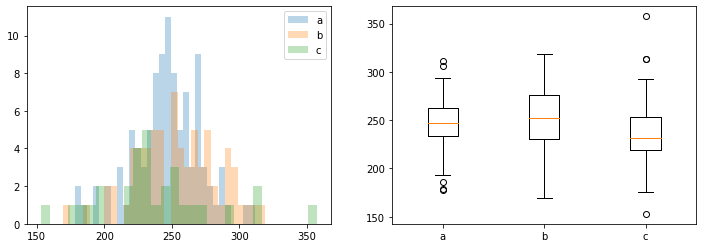

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova10.csv')

data = df[df.target=='a'].value
data2 = df[df.target=='b'].value
data3 = df[df.target=='c'].value

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(data,alpha=0.3,bins=30,label='a')
ax[0].hist(data2,alpha=0.3,bins=30,label='b')
ax[0].hist(data3,alpha=0.3,bins=30,label='c')
ax[0].legend()
labels = ['a', 'b', 'c']
lst =[data,data2,data3]
ax[1].boxplot(lst, labels=labels) 
plt.show()

In [12]:
from scipy.stats import shapiro

# 정규성 검정 -> 정규성 가짐
print(shapiro(data))
print(shapiro(data2))
print(shapiro(data3))

from scipy.stats import levene

# 등분산 만족하지 않음 -> welch test를 진행해야한다 (pingouin.welch_anova)
print(levene(data,data2,data3))
print()

# anova
from scipy.stats import f_oneway  ,kruskal
print(f_oneway(data, data2, data3))
print(kruskal(data, data2, data3))

import pingouin as pg
display(pg.welch_anova(dv='value', between='target', data=df))


# 비교를 위해 f_oneway 와 kruskal 모두 시행했다.
# kruskal의 경우 평균의 차이가 존재, f_oneway, welch(p-unc값)의 경우 차이가 존재하지 않는다

ShapiroResult(statistic=0.9835558533668518, pvalue=0.24877400696277618)
ShapiroResult(statistic=0.9923046231269836, pvalue=0.9479172825813293)
ShapiroResult(statistic=0.9523516893386841, pvalue=0.19537121057510376)
LeveneResult(statistic=4.530341210288782, pvalue=0.011923468290294031)

F_onewayResult(statistic=3.0058619004231084, pvalue=0.051771776524375666)
KruskalResult(statistic=7.273258848614091, pvalue=0.026340978769385875)


Source  ddof1      ddof2         F     p-unc       np2
0  target      2  69.100989  2.244923  0.113608  0.029613